In [156]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [157]:
train = pd.read_csv('train.tsv', sep='\t', index_col=0)
test = pd.read_csv('test.tsv', sep='\t', index_col=0)
sample_subumit = pd.read_csv('sample_submit.tsv', sep='\t', index_col=0, header=None)

In [158]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 3 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    int64  
 1   pclass    445 non-null    int64  
 2   sex       445 non-null    object 
 3   age       360 non-null    float64
 4   sibsp     445 non-null    int64  
 5   parch     445 non-null    int64  
 6   fare      445 non-null    float64
 7   embarked  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


In [160]:
train['survived'].value_counts()

survived
0    266
1    179
Name: count, dtype: int64

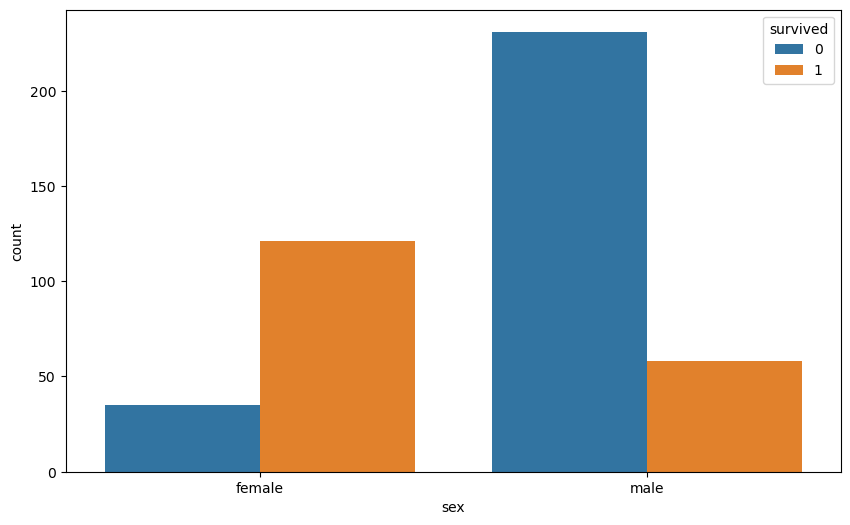

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=train)
plt.show()

In [162]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [163]:
tmp = train[train['fare']>200]
tmp

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
88,1,1,female,23.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
377,0,1,male,27.0,0,2,211.5000,C
438,0,1,male,64.0,1,4,263.0000,S
679,1,1,male,36.0,0,1,512.3292,C
689,1,1,female,15.0,0,1,211.3375,S
716,1,1,female,38.0,0,0,227.5250,C
730,1,1,female,29.0,0,0,211.3375,S
737,1,1,male,35.0,0,0,512.3292,C


In [164]:
pd.get_dummies(train).corrwith(train['survived']).abs().sort_values(ascending=False)

survived      1.000000
sex_female    0.559465
sex_male      0.559465
pclass        0.358097
fare          0.258605
embarked_C    0.182568
embarked_S    0.172769
age           0.081394
parch         0.079669
sibsp         0.045087
embarked_Q    0.005062
dtype: float64

In [165]:
pd.get_dummies(train).corr()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.358097,-0.081394,-0.045087,0.079669,0.258605,0.559465,-0.559465,0.182568,0.005062,-0.172769
pclass,-0.358097,1.000000,-0.300686,0.069857,-0.015726,-0.549651,-0.193761,0.193761,-0.207779,0.252136,0.034011
age,-0.081394,-0.300686,1.000000,-0.283126,-0.153382,0.098488,-0.072899,0.072899,0.004219,-0.018107,-0.015860
sibsp,-0.045087,0.069857,-0.283126,1.000000,0.423522,0.164773,0.097883,-0.097883,-0.074573,-0.095163,0.129479
parch,0.079669,-0.015726,-0.153382,0.423522,1.000000,0.241855,0.220046,-0.220046,-0.014436,-0.129345,0.099990
fare,0.258605,-0.549651,0.098488,0.164773,0.241855,1.000000,0.168935,-0.168935,0.219983,-0.146377,-0.105108
sex_female,0.559465,-0.193761,-0.072899,0.097883,0.220046,0.168935,1.000000,-1.000000,0.102369,0.055430,-0.137247
sex_male,-0.559465,0.193761,0.072899,-0.097883,-0.220046,-0.168935,-1.000000,1.000000,-0.102369,-0.055430,0.137247
embarked_C,0.182568,-0.207779,0.004219,-0.074573,-0.014436,0.219983,0.102369,-0.102369,1.000000,-0.143993,-0.764582
embarked_Q,0.005062,0.252136,-0.018107,-0.095163,-0.129345,-0.146377,0.055430,-0.055430,-0.143993,1.000000,-0.510059


In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    446 non-null    int64  
 1   sex       446 non-null    object 
 2   age       354 non-null    float64
 3   sibsp     446 non-null    int64  
 4   parch     446 non-null    int64  
 5   fare      446 non-null    float64
 6   embarked  446 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 27.9+ KB


In [167]:
all = pd.concat([train, test], axis=0)
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [168]:
# 中央値で補完
all['age'].fillna(all['age'].median(), inplace=True)

In [169]:
all = all.dropna(subset=['embarked'])

In [170]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 3 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  443 non-null    float64
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.5+ KB


In [171]:
all = pd.get_dummies(all, columns=['sex', 'embarked'])

In [172]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 3 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    443 non-null    float64
 1   pclass      889 non-null    int64  
 2   age         889 non-null    float64
 3   sibsp       889 non-null    int64  
 4   parch       889 non-null    int64  
 5   fare        889 non-null    float64
 6   sex_female  889 non-null    bool   
 7   sex_male    889 non-null    bool   
 8   embarked_C  889 non-null    bool   
 9   embarked_Q  889 non-null    bool   
 10  embarked_S  889 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 53.0 KB


In [173]:
tmpdf = all[~all['survived'].isnull()]

In [174]:
tmpdf.corrwith(tmpdf['survived']).abs().sort_values(ascending=False)

survived      1.000000
sex_female    0.556166
sex_male      0.556166
pclass        0.352644
fare          0.255041
embarked_C    0.185839
embarked_S    0.165277
parch         0.082790
age           0.079817
sibsp         0.042734
embarked_Q    0.006792
dtype: float64

<Axes: xlabel='fare', ylabel='pclass'>

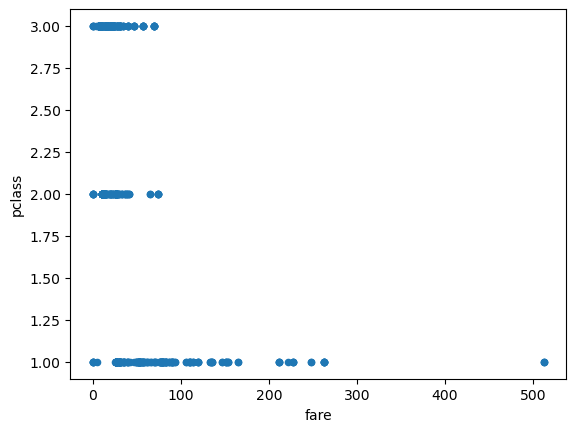

In [175]:
all.plot.scatter(x='fare', y='pclass')

In [176]:
corr = all['fare'].corr(all['pclass'])
print(corr)

-0.5481932852366438


In [177]:
avg_survived_by_pclass = tmpdf.groupby('pclass')['survived'].mean()
print(avg_survived_by_pclass)

pclass
1    0.679245
2    0.443299
3    0.258333
Name: survived, dtype: float64


<Axes: xlabel='fare', ylabel='survived'>

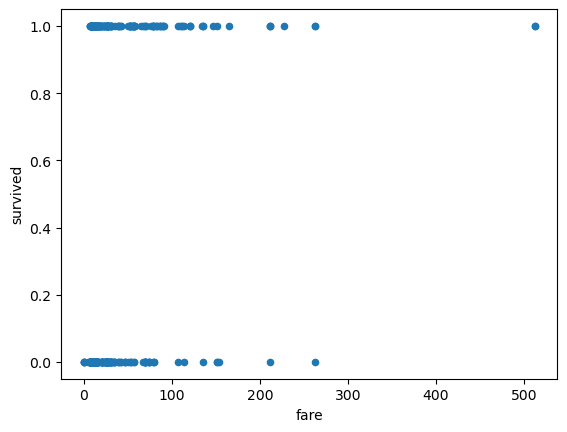

In [178]:
tmpdf.plot.scatter(x='fare', y='survived')

In [179]:
print(all['fare'].value_counts())

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
15.0458     1
9.8417      1
25.5875     1
26.2833     1
10.5167     1
Name: count, Length: 247, dtype: int64


In [180]:

C_survived = tmpdf.groupby('embarked_Q')['survived'].mean()
print(C_survived)

embarked_Q
False    0.398515
True     0.410256
Name: survived, dtype: float64


In [181]:
all.corrwith(all['embarked_C']).abs().sort_values(ascending=False)

embarked_C    1.000000
embarked_S    0.782613
fare          0.270731
pclass        0.245733
survived      0.185839
embarked_Q    0.148646
sex_female    0.084520
sex_male      0.084520
sibsp         0.060074
age           0.032098
parch         0.011588
dtype: float64

In [182]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 3 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    443 non-null    float64
 1   pclass      889 non-null    int64  
 2   age         889 non-null    float64
 3   sibsp       889 non-null    int64  
 4   parch       889 non-null    int64  
 5   fare        889 non-null    float64
 6   sex_female  889 non-null    bool   
 7   sex_male    889 non-null    bool   
 8   embarked_C  889 non-null    bool   
 9   embarked_Q  889 non-null    bool   
 10  embarked_S  889 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 53.0 KB


In [183]:
train = all[all['survived'].notnull()]
test = all[all['survived'].isnull()]

In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    0 non-null      float64
 1   pclass      446 non-null    int64  
 2   age         446 non-null    float64
 3   sibsp       446 non-null    int64  
 4   parch       446 non-null    int64  
 5   fare        446 non-null    float64
 6   sex_female  446 non-null    bool   
 7   sex_male    446 non-null    bool   
 8   embarked_C  446 non-null    bool   
 9   embarked_Q  446 non-null    bool   
 10  embarked_S  446 non-null    bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 26.6 KB


In [185]:
test = test.drop(columns='survived')

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
X = train.drop(columns=['survived'])
y = train['survived']

In [188]:
model = LogisticRegression()
model.fit(X,y)

c:\Users\sinis\anaconda3\envs\toukeiweb\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
model.score(X, y)

0.8081264108352144

In [202]:
pred = model.predict_proba(test)[:,1]

In [204]:
len(pred)

446

In [205]:
sample_subumit[1]=pred

In [207]:
sample_subumit.tail(10)

,1
0,
878,0.111772
880,0.807624
881,0.096943
882,0.664422
883,0.228750
885,0.583525
886,0.236070
887,0.927306
889,0.608435


In [208]:
sample_subumit.to_csv('submit.tsv', header=None, sep='\t')